In [33]:
import pandas as pd
import numpy as np


import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
data = pd.read_csv('Mall_Customers.csv')
data.index = data['CustomerID']
data.drop(columns='CustomerID', inplace=True)
df = data
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [9]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


(None,
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64)

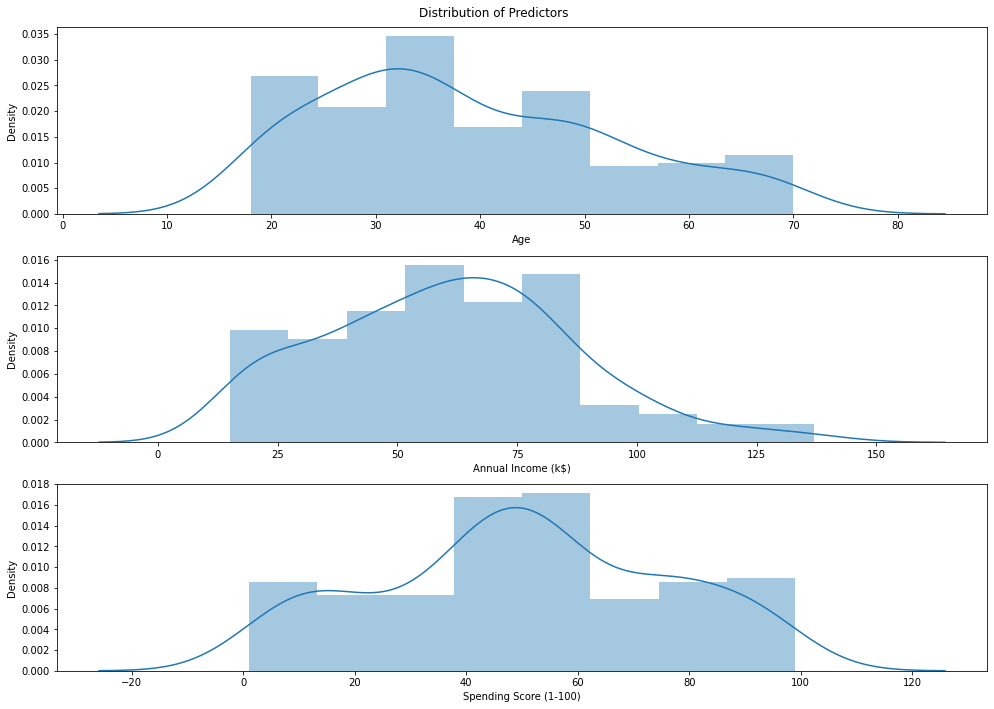

In [20]:
fig, ax = plt.subplots(3, figsize=(14, 10))
sns.distplot(df['Age'], ax=ax[0])
sns.distplot(df['Annual Income (k$)'], ax=ax[1])
sns.distplot(df['Spending Score (1-100)'], ax=ax[2])
plt.suptitle('Distribution of Predictors')
plt.tight_layout()
plt.show()

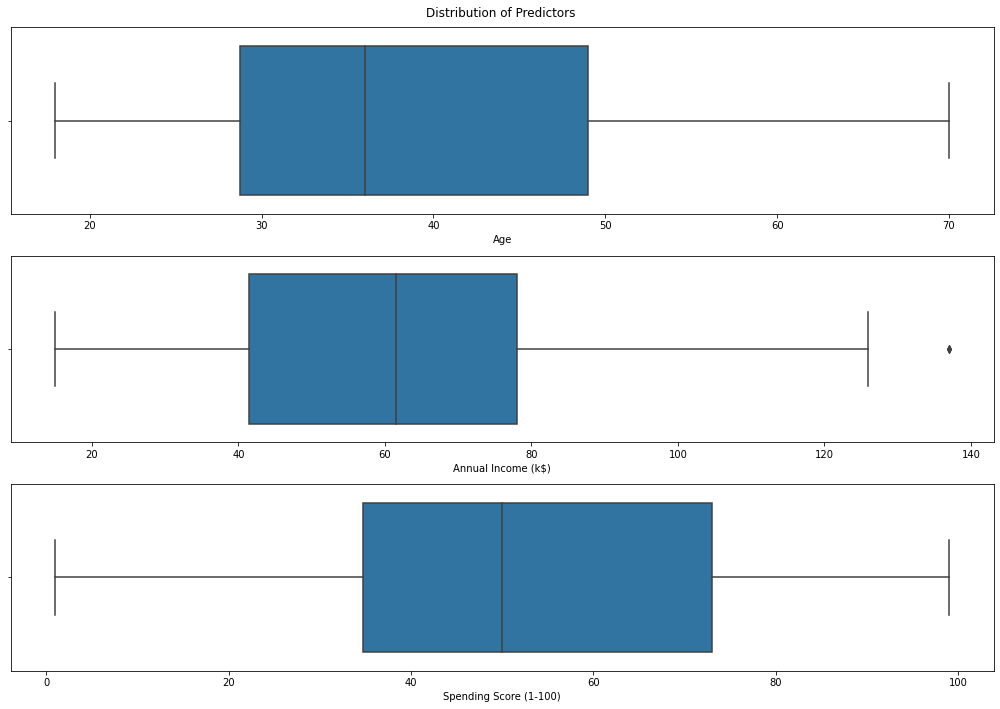

In [22]:
fig, ax = plt.subplots(3, figsize=(14, 10))
sns.boxplot(df['Age'], ax=ax[0])
sns.boxplot(df['Annual Income (k$)'], ax=ax[1])
sns.boxplot(df['Spending Score (1-100)'], ax=ax[2])
plt.suptitle('Distribution of Predictors')
plt.tight_layout()
plt.show()

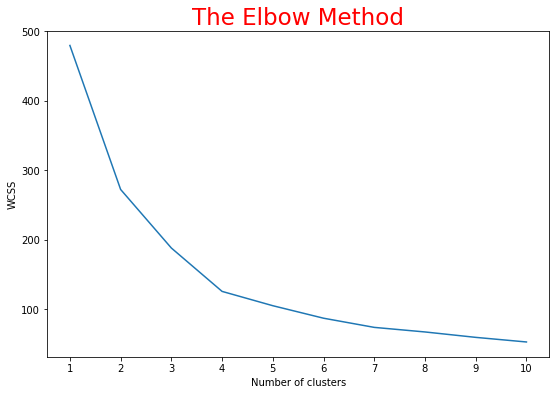

In [102]:
ms = StandardScaler()
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

X = df.values
X_scaled = ms.fit_transform(X)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_final = pca.fit_transform(X_scaled)

# finding optimum number of clusters
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X_final)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [103]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_final)

<AxesSubplot:>

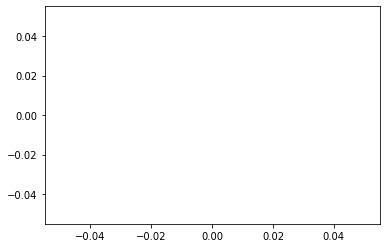

In [107]:
# Plot clusters